*Proyecto base y set de datos originales extraidos de <a src="https://datascience4business.com/01_pdsm-tps-optin">datascience4business</a>*

___

# Proyecto: Analisis del costo por abandono de empleados

Analizaremos los datos de empleados en la empresa "Y" para calcular cuanto dinero pierde anualmente en entrenamiento al nuevo personal que se debe contratar o mover de area, tras la renuncia de los empleados. Ademas intentaremos adelantarnos a los empleados que estan en riesgo de renunciar basandos en tecnicas de aprendizaje automarico.

## Cargamos las librerias iniciales

In [1]:
import pandas as pd

### CARGA DE LOS DATOS

In [2]:
data = pd.read_csv('abandono_original.csv', sep = ';', index_col= 'id', na_values='#N/D')
data.shape

(1470, 31)

Utilizare el modulo eda_vx para facilitar la limpieza de datos de forma estandar

In [3]:
from eda_vx import Eda

Analizamos cantidad de datos nulos como porcentaje en cada variable

In [4]:
Eda.analizar_nulos(data)

anos_en_puesto              84.217687
conciliacion                68.775510
sexo                        13.537415
educacion                    6.870748
satisfaccion_trabajo         5.170068
implicacion                  1.224490
edad                         0.000000
nivel_acciones               0.000000
evaluacion                   0.000000
satisfaccion_companeros      0.000000
horas_quincena               0.000000
anos_experiencia             0.000000
horas_extra                  0.000000
num_formaciones_ult_ano      0.000000
anos_compania                0.000000
anos_desde_ult_promocion     0.000000
incremento_salario_porc      0.000000
salario_mes                  0.000000
mayor_edad                   0.000000
num_empresas_anteriores      0.000000
abandono                     0.000000
estado_civil                 0.000000
puesto                       0.000000
nivel_laboral                0.000000
satisfaccion_entorno         0.000000
empleados                    0.000000
carrera     

Conclusiones:<br>
* Eliminaremos las variables con mas del 50% valores nulos, ya que imputar los datos faltantes en estas 
nos puede dar resultados bastante artificiales. 
Eliminaremos ``anos_en_puesto`` y ``conciliacion``<br>

In [5]:
df = Eda.eliminar_nulos_si(data,p=0.5)
df.shape

(1470, 29)

Graficámos las variables categóricas, para eso debemos importar la clase desde el modulo

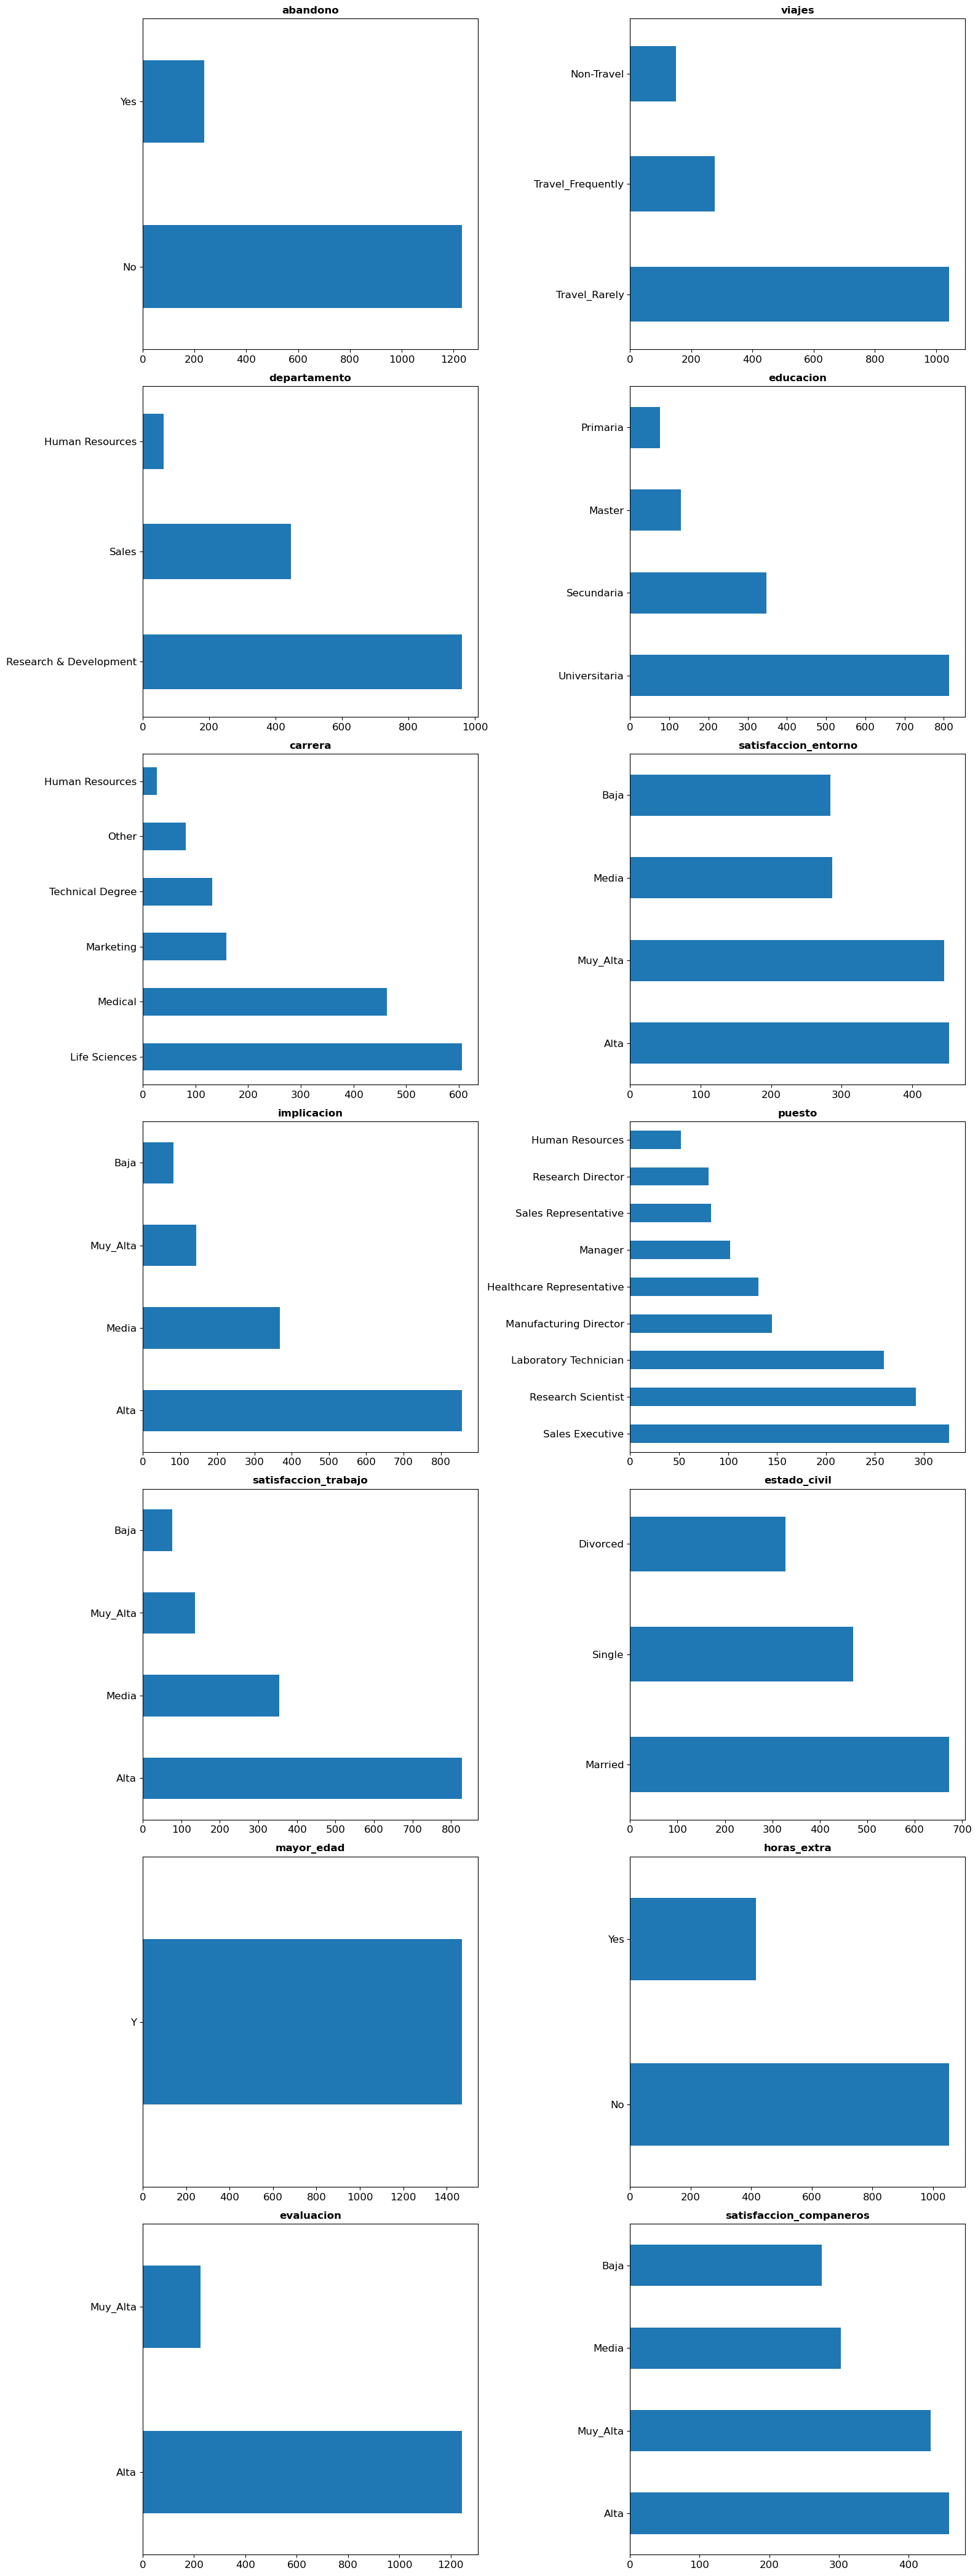

In [6]:
from eda_vx import Graph


Graph.graficos_categoricos(df=df)

Conclusiones:<br>
* La variable "``mayor de edad``" es constante -> *eliminarla*<br>
* Imputamos los nulos de las variables que faltaban completar con la moda:<br>
    * ``educacion`` -> "Universitaria"<br>
    * ``satisfaccion_trabajo`` -> "Alta"<br>
    * ``implicacion`` -> "Alta"

Por el momento solo tomamos nota y seguimos con las numericas

Analizamos las variables Numericas

In [7]:
Eda.estadisticos_numericos(df)

                           count         mean          std     min     25%  \
edad                      1470.0    36.923810     9.135373    18.0    30.0   
distancia_casa            1470.0     9.192517     8.106864     1.0     2.0   
empleados                 1470.0     1.000000     0.000000     1.0     1.0   
sexo                      1271.0     2.727773     0.720788     1.0     2.0   
nivel_laboral             1470.0     2.063946     1.106940     1.0     1.0   
salario_mes               1470.0  6502.931293  4707.956783  1009.0  2911.0   
num_empresas_anteriores   1470.0     2.693197     2.498009     0.0     1.0   
incremento_salario_porc   1470.0    15.209524     3.659938    11.0    12.0   
horas_quincena            1470.0    80.000000     0.000000    80.0    80.0   
nivel_acciones            1470.0     0.793878     0.852077     0.0     0.0   
anos_experiencia          1470.0    11.279592     7.780782     0.0     6.0   
num_formaciones_ult_ano   1470.0     2.799320     1.289271     0

Conclusiones:
* La variable "``empleados``" es constante -> *eliminarla*
* La variable "``horas_quincena``" es constante -> *eliminarla*
* Imputamos a la variable "``edad``" la mediana -> 36
* No podemos interpretar la variable "``sexo``" -> *eliminarla*

In [8]:
df = Eda.eliminar_unitarios(df)
df = Eda.imputar_faltantes(df,metodo='mm') # Podemos seleccionar "mediana y moda (mm) o k vecinos mas cercanos (knn)"
df = df.drop('sexo', axis=1)
df.shape

(1470, 25)

Analizamos si aun quedan datos nulos

In [9]:
Eda.analizar_nulos(df)

edad                        0.0
salario_mes                 0.0
anos_desde_ult_promocion    0.0
anos_compania               0.0
num_formaciones_ult_ano     0.0
anos_experiencia            0.0
nivel_acciones              0.0
satisfaccion_companeros     0.0
evaluacion                  0.0
incremento_salario_porc     0.0
horas_extra                 0.0
num_empresas_anteriores     0.0
estado_civil                0.0
abandono                    0.0
satisfaccion_trabajo        0.0
puesto                      0.0
nivel_laboral               0.0
implicacion                 0.0
satisfaccion_entorno        0.0
carrera                     0.0
educacion                   0.0
distancia_casa              0.0
departamento                0.0
viajes                      0.0
anos_con_manager_actual     0.0
dtype: float64


Nos respondemos algunas preguntas estadisticas:

1. Tasa de abandono

In [10]:
df.abandono.value_counts(normalize=True)*100

No     83.877551
Yes    16.122449
Name: abandono, dtype: float64

* Tenemos una **tasa de abandono** del **16%**

2. Transformamos las variables categoricas a numericas excepto nuestra variables objetivo que sera "``abandono``".

In [11]:
# Separamos nuestro target del resto del dataset y utilizamos un map para codificar a 0 y 1.
df["abandono"] = df.abandono.map({"No":0, "Yes": 1})
df["abandono"]

id
1       1
2       0
4       1
5       0
7       0
       ..
2061    0
2062    0
2064    0
2065    0
2068    0
Name: abandono, Length: 1470, dtype: int64

<Axes: xlabel='educacion'>

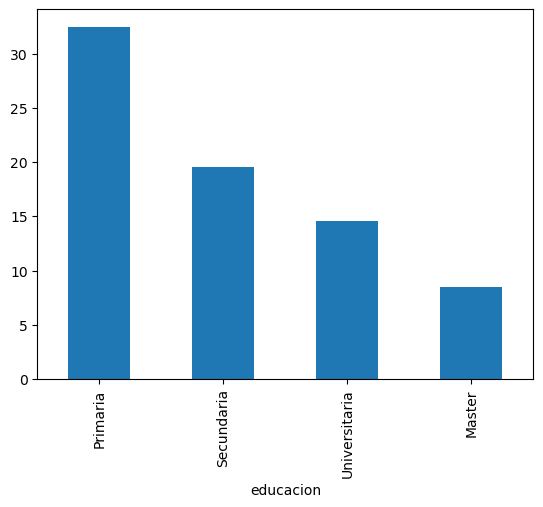

In [12]:
# Relacion de "abandono" con "educacion"
# PD: abandono.mean() de una variable binaria es el porcentaje de cada valor lo que facilita calculos.
aux = df.groupby("educacion").abandono.mean().sort_values(ascending=False)*100
aux.plot.bar()

<Axes: xlabel='estado_civil'>

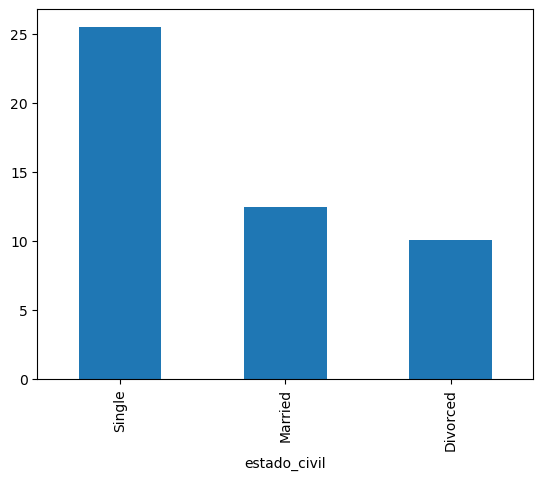

In [13]:
# Relacion de "abandono" con "estado_civil"
aux = df.groupby("estado_civil").abandono.mean().sort_values(ascending=False)*100
aux.plot.bar()

<Axes: xlabel='horas_extra'>

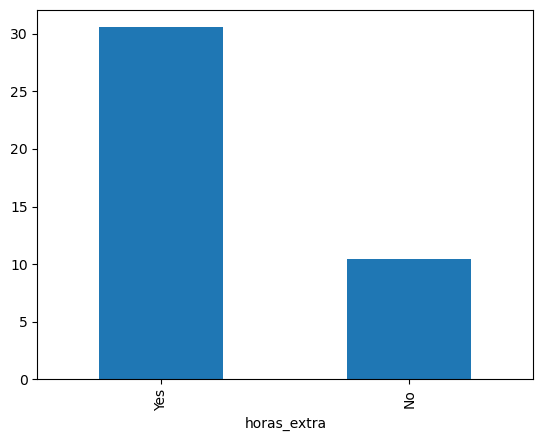

In [14]:
# Relacion de "abandono" con "horas_extra"
aux = df.groupby("horas_extra").abandono.mean().sort_values(ascending=False)*100
aux.plot.bar()

<Axes: xlabel='puesto'>

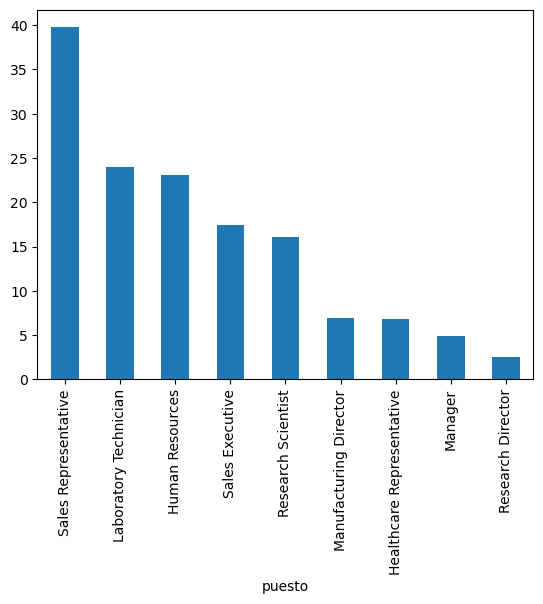

In [15]:
# Relacion de "abandono" con "puesto"
aux = df.groupby("puesto").abandono.mean().sort_values(ascending=False)*100
aux.plot.bar()

<Axes: xlabel='abandono'>

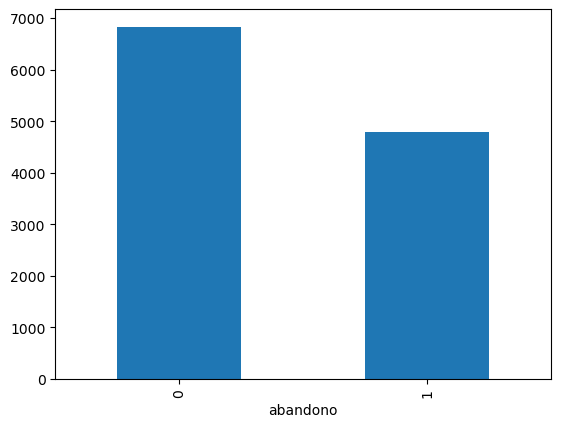

In [16]:
# Relacion de ""abandono" on "salario_mes"
aux = df.groupby("abandono").salario_mes.mean()
aux.plot.bar()

CONCLUSIONES:
* Menor educacion mayor abandono
* Solteros son los que mas abandonan
* A mayor cantidad de horas extras mas es el abandono
* El mayor abandono se da en los representantes de ventas
* A menor salario mayor es el abandono

### ESTIMACION DEL IMPACTO ECONOMICO

Según el estudio "Cost of Turnover" del Center for American Progress <a link=https://www.americanprogress.org/article/there-are-significant-business-costs-to-replacing-employees/> (Link to Articule)</a>:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [17]:
# Creamos la Variable "salario_anual"
df["salario_anual"] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_anual']]

,salario_mes,salario_anual
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [18]:
# Creamos una nueva variable con los costos individualmente
#b = df.salario_anual.where((df["salario_anual"] < 30000) & (df["abandono"] == 1)).fillna(0)*0.161
#m = df.salario_anual.where((df["salario_anual"] >= 30000) & (df["salario_anual"] < 50000)& (df["abandono"] == 1)).fillna(0)*0.197
#a = df.salario_anual.where((df["salario_anual"] >= 50000) & (df["salario_anual"] < 75000)& (df["abandono"] == 1)).fillna(0)*0.204
#ma = df.salario_anual.where((df["salario_anual"] >= 75000)& (df["abandono"] == 1)).fillna(0)*0.21
#df["impacto_economico"] = a + b + m + ma

In [19]:
# Creamos una nueva variable con los costos individualmente
b = df.salario_anual.where(df["salario_anual"] < 30000).fillna(0)*0.161
m = df.salario_anual.where((df["salario_anual"] >= 30000) & (df["salario_anual"] < 50000)).fillna(0)*0.197
a = df.salario_anual.where((df["salario_anual"] >= 50000) & (df["salario_anual"] < 75000)).fillna(0)*0.204
ma = df.salario_anual.where(df["salario_anual"] >= 75000).fillna(0)*0.21
df["impacto_economico"] = a + b + m + ma

#### ¿Cúanto nos ha costado este problema en el último año?

In [20]:
# Calculamos el impacto total
#costo_anual = df["impacto_economico"].sum()
costo_anual = df["impacto_economico"].where(df["abandono"]==1).sum()
print(f'Impacto anual en u$s {round(costo_anual):,}')

Impacto anual en u$s 2,719,006


#### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [21]:
imp_baja = df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_economico.sum()
print(f'El costo de tener empleados desmotivados es de u$s {round(imp_baja):,} anuales')

El costo de tener empleados desmotivados es de u$s 368,673 anuales


#### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [22]:
print(f"Reducir un 5% la fuga de empleados nos ahorraría u$s {round(int(costo_anual * 0.05)):,} cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría u$s {round(int(costo_anual * 0.2)):,} cada año.")

print(f"Reducir un 50% la fuga de empleados nos ahorraría u$s {round(int(costo_anual * 0.5)):,} cada año.")

Reducir un 5% la fuga de empleados nos ahorraría u$s 135,950 cada año.
Reducir un 20% la fuga de empleados nos ahorraría u$s 543,801 cada año.
Reducir un 50% la fuga de empleados nos ahorraría u$s 1,359,502 cada año.


#### ¿Que porcentaje de Representante de ventas se nos ha ido el año pasado?

In [23]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

print(f'Hemos perdido un %{round(porc_pasado*100)} de ellos el años anterior')

Hemos perdido un %40 de ellos el años anterior


#### ¿Cuantos representantes de ventas se nos iran este año?

In [24]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

print(f"Estimamos que unos {se_iran} dejaran la empresa este año")

Estimamos que unos 19 dejaran la empresa este año


#### ¿Cuanto dinero podemos ahorrarnos en contrataciones si logramos retener un 20% de ellos?

In [25]:
retenemos = int(se_iran * 0.2)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1),'impacto_economico'].sum() * porc_pasado * 0.2

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar unos u$s {round(ahorramos):,}.')

Podemos retener 3 representantes de ventas y ello supondría ahorrar unos u$s 13,462.


Conclusion:
* Podriamos dedicar parte de esos uSs 13,462 para incentivar a los representantes a que no abandonen la empresa

Guardamos los Datos limpios para utilizarlos luego en los modelos de Aprendizaje

In [26]:
# Volvemos los datos de abandono a los valores iniciales invirtiendo lo que hicimos anteriormente
df["abandono"] = df.abandono.map({0:"No", 1:"Yes"})

# Guardamos
try:
    df.to_csv('abandono_modificado.csv', index=False)
    print("Los datos se guardaron exitosamente")
except Exception as e:
    print(f"Se genero un problema durante el guardado. Descripcion {e}")

Los datos se guardaron exitosamente
